In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from sklearn.metrics import r2_score
import statistics as stat
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
from matplotlib.pyplot import subplots
import pandas as pd
import statsmodels.formula.api as smf 
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
import math
import statsmodels.api as smf_non

In [3]:
convert = {'JAN': 1,
          'FEB': 2,
          'MAR': 3,
          'APR': 4, 
          'MAY': 5,
          'JUN': 6,
          'JUL': 7,
          'AUG': 8,
          'SEP': 9,
          'OCT': 10,
          'NOV': 11,
          'DEC': 12} 

In [4]:
sales = pd.read_csv("Car_sales.csv")

items = sales.columns.tolist()[5:-2]

items.append('Ratio_Used_New_Sales_Change')

items.remove( 'Avg_Used_Previous')

items.remove('Avg_New_Previous')

#items.remove('Ratio_Used_New_prev')

In [5]:
items

['Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New_Sales_Change']

# Multinomial

In [6]:
# econ_data = ['MYAGM2USM052S', 'MEDCPIM158SFRBCLE', 'UNRATE', 'REAINTRATREARAT10Y', 'CORESTICKM159SFRBATL']

econ_data = ['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']








In [7]:
from itertools import combinations

In [8]:
combos = list(combinations(econ_data, 3))

In [9]:
for combo in combos:
    print(list(combo))

['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev']
['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'REAINTRATREARAT10Y_Prev']
['MYAGM2USM052S_Prev', 'MEDCPIM158SFRBCLE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MYAGM2USM052S_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev']
['MYAGM2USM052S_Prev', 'UNRATE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MYAGM2USM052S_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']
['MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'REAINTRATREARAT10Y_Prev']
['MEDCPIM158SFRBCLE_Prev', 'UNRATE_Prev', 'CORESTICKM159SFRBATL_Prev']
['MEDCPIM158SFRBCLE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']
['UNRATE_Prev', 'REAINTRATREARAT10Y_Prev', 'CORESTICKM159SFRBATL_Prev']


In [10]:
sales

,Unnamed: 0,Year,Month,New,Used,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,1,2002,FEB,27520,50982,664454223,361353242,7087.859284,24144.412173,7740.940353,24272.353244,-0.092141,-0.005299,1.852544,0.293561
1,2,2002,MAR,34225,58794,805666244,419385387,7133.132411,23540.284704,7087.859284,24144.412173,0.006347,-0.025664,1.717867,0.303018
2,3,2002,APR,36452,59817,846368297,433061150,7239.767123,23218.706710,7133.132411,23540.284704,0.014729,-0.013850,1.640980,0.311808
3,4,2002,MAY,37359,60577,855005784,442569410,7305.898443,22886.206376,7239.767123,23218.706710,0.009052,-0.014528,1.621483,0.319227
4,5,2002,JUN,36348,55415,830251613,414731166,7484.095750,22841.741306,7305.898443,22886.206376,0.023810,-0.001947,1.524568,0.327650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,249,2022,OCT,22255,47325,1060091844,804805365,17005.924247,47633.873017,17366.504576,47788.648533,-0.021203,-0.003249,2.126488,0.357013
249,250,2022,NOV,21117,43345,993531237,734729853,16950.740639,47048.881801,17005.924247,47633.873017,-0.003256,-0.012434,2.052612,0.360279
250,251,2022,DEC,23025,40906,1120587035,718545405,17565.770425,48668.275136,16950.740639,47048.881801,0.035013,0.033274,1.776591,0.360929
251,252,2023,JAN,21037,45543,992034915,762502754,16742.479722,47156.672292,17565.770425,48668.275136,-0.049174,-0.032055,2.164900,0.355039


In [11]:
sales['Num_Month'] = sales['Month '].apply(lambda x: convert[x])

sales['DATE'] = sales.apply(lambda row: f"{row['Year ']}-{row['Num_Month']}-01", axis=1)

In [12]:
econ_data = ['MYAGM2USM052S', 'MEDCPIM158SFRBCLE', 'UNRATE', 'Ten_Year', 'CORESTICKM159SFRBATL']

final_df = sales
for econ in econ_data:
    
    econ_df = pd.read_csv(f'{econ}.csv')
    
    final_df = pd.merge(econ_df, final_df, on='DATE')
    

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15175/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15175/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Ten_Change_y', 'Datetime_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15175/3078440734.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = pd.merge(econ_df, final_df, on='DATE')


In [13]:
final_df.columns.tolist()

['Unnamed: 0_x',
 'DATE',
 'CORESTICKM159SFRBATL',
 'Datetime',
 'CORESTICKM159SFRBATL_Prev',
 'Ten_Change',
 'Unnamed: 0_y',
 'REAINTRATREARAT10Y',
 'Datetime_x',
 'REAINTRATREARAT10Y_Prev',
 'Ten_Change_x',
 'Unnamed: 0_x',
 'UNRATE',
 'Datetime_y',
 'UNRATE_Prev',
 'Ten_Change_y',
 'Unnamed: 0_y',
 'MEDCPIM158SFRBCLE',
 'Datetime_x',
 'MEDCPIM158SFRBCLE_Prev',
 'Ten_Change_x',
 'Unnamed: 0_x',
 'MYAGM2USM052S',
 'Datetime_y',
 'MYAGM2USM052S_Prev',
 'Ten_Change_y',
 'Unnamed: 0_y',
 'Year ',
 'Month ',
 'New',
 'Used',
 'Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Avg_Used_Previous',
 'Avg_New_Previous',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New',
 'Ratio_Used_New_Sales',
 'Num_Month']

In [14]:
data_df = final_df[['CORESTICKM159SFRBATL_Prev', 'REAINTRATREARAT10Y_Prev', 'MEDCPIM158SFRBCLE_Prev', 'MYAGM2USM052S_Prev', 'UNRATE_Prev', 'Total Sales New',
 'Total Sales Used',
 'Avg_Used',
 'Avg_New',
 'Avg_Used_Previous',
 'Avg_New_Previous',
 'Change_Car_Sales_Used',
 'Change_Car_Sales_New',
 'Ratio_Used_New',
 'Ratio_Used_New_Sales']]

data_df.head()

,CORESTICKM159SFRBATL_Prev,REAINTRATREARAT10Y_Prev,MEDCPIM158SFRBCLE_Prev,MYAGM2USM052S_Prev,UNRATE_Prev,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,3.037465,1.446108,2.717798,5.654800e+12,5.7,865326154,456738532,7872.087763,24530.166515,7787.911508,23918.018495,0.010693,0.024955,1.644744,0.320915
1,2.947748,1.268696,2.313903,5.707400e+12,5.7,691740703,379196575,7728.296071,24872.022976,7872.087763,24530.166515,-0.018606,0.013745,1.764203,0.310722
2,2.834183,1.395587,1.910976,5.750700e+12,5.9,673208880,374453368,8818.759992,24939.204268,7728.296071,24872.022976,0.123653,0.002694,1.572979,0.353610
3,2.184248,1.897238,2.022265,6.072600e+12,6.1,980365678,470520906,7538.345419,25400.048657,7654.893272,25019.893906,-0.015461,0.014967,1.617146,0.296785
4,2.161113,1.380819,2.095867,6.059600e+12,6.0,779674957,385164663,7603.684987,25855.578080,7538.345419,25400.048657,0.008593,0.017618,1.679821,0.294083


In [15]:
data_df = data_df.rename(columns={'Total Sales Used': 'Total_Sales_Used', 'Total Sales New': 'Total_Sales_New'})
data_df.head()

,CORESTICKM159SFRBATL_Prev,REAINTRATREARAT10Y_Prev,MEDCPIM158SFRBCLE_Prev,MYAGM2USM052S_Prev,UNRATE_Prev,Total_Sales_New,Total_Sales_Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_Sales
0,3.037465,1.446108,2.717798,5.654800e+12,5.7,865326154,456738532,7872.087763,24530.166515,7787.911508,23918.018495,0.010693,0.024955,1.644744,0.320915
1,2.947748,1.268696,2.313903,5.707400e+12,5.7,691740703,379196575,7728.296071,24872.022976,7872.087763,24530.166515,-0.018606,0.013745,1.764203,0.310722
2,2.834183,1.395587,1.910976,5.750700e+12,5.9,673208880,374453368,8818.759992,24939.204268,7728.296071,24872.022976,0.123653,0.002694,1.572979,0.353610
3,2.184248,1.897238,2.022265,6.072600e+12,6.1,980365678,470520906,7538.345419,25400.048657,7654.893272,25019.893906,-0.015461,0.014967,1.617146,0.296785
4,2.161113,1.380819,2.095867,6.059600e+12,6.0,779674957,385164663,7603.684987,25855.578080,7538.345419,25400.048657,0.008593,0.017618,1.679821,0.294083


In [18]:
len(data_df)

45

# Testing if Independent Variables are stationary

<AxesSubplot:>

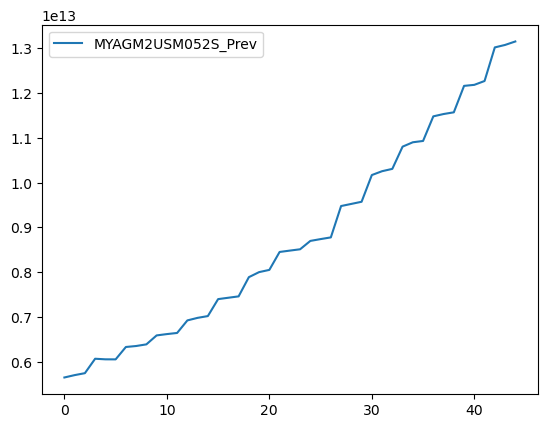

In [35]:
data_df.plot(y='MYAGM2USM052S_Prev')

In [36]:
data_df['Prev_MYAGM2USM052S_Prev'] = data_df['MYAGM2USM052S_Prev'].shift(1)
data_df['change_MYAGM2USM052S_Prev'] = data_df['MYAGM2USM052S_Prev'] - data_df['Prev_MYAGM2USM052S_Prev']


mod1 = smf.ols(f'change_MYAGM2USM052S_Prev ~ data_df.index + Prev_MYAGM2USM052S_Prev', data = data_df).fit() 
print(mod1.summary())

                                OLS Regression Results                               
Dep. Variable:     change_MYAGM2USM052S_Prev   R-squared:                       0.149
Model:                                   OLS   Adj. R-squared:                  0.107
Method:                        Least Squares   F-statistic:                     3.587
Date:                       Sun, 06 Oct 2024   Prob (F-statistic):             0.0367
Time:                               15:46:17   Log-Likelihood:                -1205.8
No. Observations:                         44   AIC:                             2418.
Df Residuals:                             41   BIC:                             2423.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [38]:


data_df['Prev_change_MYAGM2USM052S_Prev'] = data_df['change_MYAGM2USM052S_Prev'].shift(1)
data_df['change_change_Prev_MYAGM2USM052S_Prev'] = data_df['change_MYAGM2USM052S_Prev'] - data_df['Prev_change_MYAGM2USM052S_Prev']


mod1 = smf.ols(f'change_change_Prev_MYAGM2USM052S_Prev ~ 0 + Prev_change_MYAGM2USM052S_Prev', data = data_df).fit() 
print(mod1.summary())

                                          OLS Regression Results                                          
Dep. Variable:     change_change_Prev_MYAGM2USM052S_Prev   R-squared (uncentered):                   0.403
Model:                                               OLS   Adj. R-squared (uncentered):              0.389
Method:                                    Least Squares   F-statistic:                              28.37
Date:                                   Sun, 06 Oct 2024   Prob (F-statistic):                    3.67e-06
Time:                                           15:47:37   Log-Likelihood:                         -1192.5
No. Observations:                                     43   AIC:                                      2387.
Df Residuals:                                         42   BIC:                                      2389.
Df Model:                                              1                                                  
Covariance Type:                     

Change in MYAGM2USM052S is stationary

<AxesSubplot:>

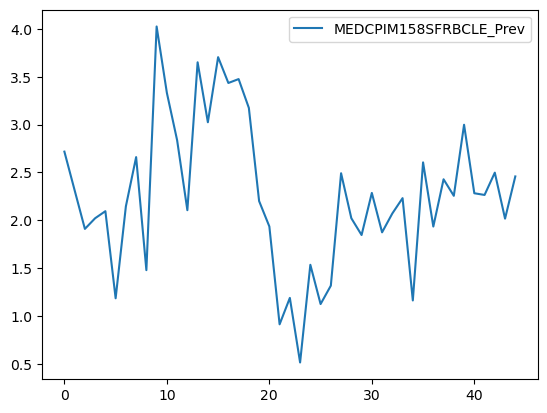

In [39]:
data_df.plot(y='MEDCPIM158SFRBCLE_Prev')

In [40]:
data_df['Prev_MEDCPIM158SFRBCLE_Prev'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(1)
data_df['change_MEDCPIM158SFRBCLE_Prev'] = data_df['MEDCPIM158SFRBCLE_Prev'] - data_df['Prev_MEDCPIM158SFRBCLE_Prev']


mod1 = smf.ols(f'change_MEDCPIM158SFRBCLE_Prev ~ data_df.index + Prev_MEDCPIM158SFRBCLE_Prev', data = data_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     change_MEDCPIM158SFRBCLE_Prev   R-squared:                       0.252
Model:                                       OLS   Adj. R-squared:                  0.216
Method:                            Least Squares   F-statistic:                     6.912
Date:                           Sun, 06 Oct 2024   Prob (F-statistic):            0.00259
Time:                                   15:49:26   Log-Likelihood:                -44.690
No. Observations:                             44   AIC:                             95.38
Df Residuals:                                 41   BIC:                             100.7
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

MEDCPIM158SFRBCLE is stationary

## REAINTRATREARAT10Y_Prev

<AxesSubplot:>

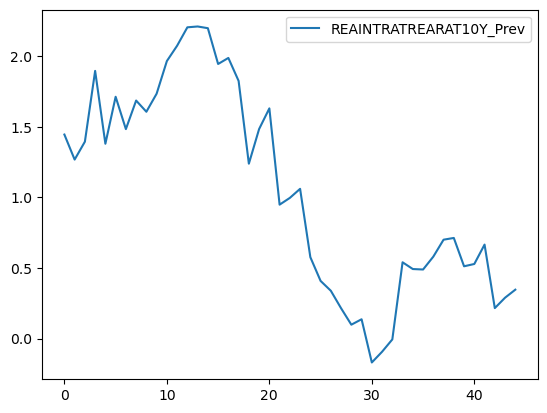

In [41]:
data_df.plot(y='REAINTRATREARAT10Y_Prev')

In [42]:
data_df['Prev_REAINTRATREARAT10Y_Prev'] = data_df['REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_REAINTRATREARAT10Y_Prev'] = data_df['REAINTRATREARAT10Y_Prev'] - data_df['Prev_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_REAINTRATREARAT10Y_Prev ~ data_df.index + Prev_REAINTRATREARAT10Y_Prev', data = data_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     change_REAINTRATREARAT10Y_Prev   R-squared:                       0.092
Model:                                        OLS   Adj. R-squared:                  0.048
Method:                             Least Squares   F-statistic:                     2.088
Date:                            Sun, 06 Oct 2024   Prob (F-statistic):              0.137
Time:                                    15:50:20   Log-Likelihood:             -0.0034129
No. Observations:                              44   AIC:                             6.007
Df Residuals:                                  41   BIC:                             11.36
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

In [44]:


data_df['Prev_change_REAINTRATREARAT10Y_Prev'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_change_Prev_REAINTRATREARAT10Y_Prev'] = data_df['change_REAINTRATREARAT10Y_Prev'] - data_df['Prev_change_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_change_Prev_REAINTRATREARAT10Y_Prev ~ 0 + Prev_change_REAINTRATREARAT10Y_Prev', data = data_df).fit() 
print(mod1.summary())

                                             OLS Regression Results                                            
Dep. Variable:     change_change_Prev_REAINTRATREARAT10Y_Prev   R-squared (uncentered):                   0.613
Model:                                                    OLS   Adj. R-squared (uncentered):              0.604
Method:                                         Least Squares   F-statistic:                              66.60
Date:                                        Sun, 06 Oct 2024   Prob (F-statistic):                    3.34e-10
Time:                                                15:52:29   Log-Likelihood:                         -1.4592
No. Observations:                                          43   AIC:                                      4.918
Df Residuals:                                              42   BIC:                                      6.680
Df Model:                                                   1                                           

REAINTRATREARAT10Y is stationary to first degree

<AxesSubplot:>

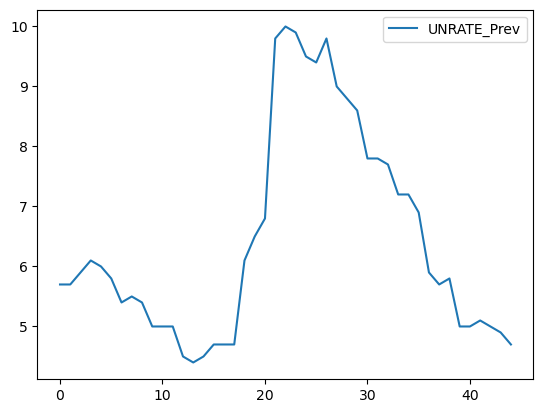

In [45]:
data_df.plot(y='UNRATE_Prev')

In [46]:
data_df['Prev_UNRATE_Prev'] = data_df['UNRATE_Prev'].shift(1)
data_df['change_UNRATE_Prev'] = data_df['UNRATE_Prev'] - data_df['Prev_UNRATE_Prev']


mod1 = smf.ols(f'change_UNRATE_Prev ~ data_df.index + Prev_UNRATE_Prev', data = data_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:     change_UNRATE_Prev   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8562
Date:                Sun, 06 Oct 2024   Prob (F-statistic):              0.432
Time:                        15:54:01   Log-Likelihood:                -39.025
No. Observations:                  44   AIC:                             84.05
Df Residuals:                      41   BIC:                             89.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.365  

In [47]:


data_df['Prev_change_UNRATE_Prev'] = data_df['change_UNRATE_Prev'].shift(1)
data_df['change_change_Prev_UNRATE_Prev'] = data_df['change_UNRATE_Prev'] - data_df['Prev_change_UNRATE_Prev']


mod1 = smf.ols(f'change_change_Prev_UNRATE_Prev ~ 0 + Prev_change_UNRATE_Prev', data = data_df).fit() 
print(mod1.summary())

                                       OLS Regression Results                                      
Dep. Variable:     change_change_Prev_UNRATE_Prev   R-squared (uncentered):                   0.408
Model:                                        OLS   Adj. R-squared (uncentered):              0.394
Method:                             Least Squares   F-statistic:                              28.97
Date:                            Sun, 06 Oct 2024   Prob (F-statistic):                    3.05e-06
Time:                                    15:54:43   Log-Likelihood:                         -38.819
No. Observations:                              43   AIC:                                      79.64
Df Residuals:                                  42   BIC:                                      81.40
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


UNRATE stationary to first degree

<AxesSubplot:>

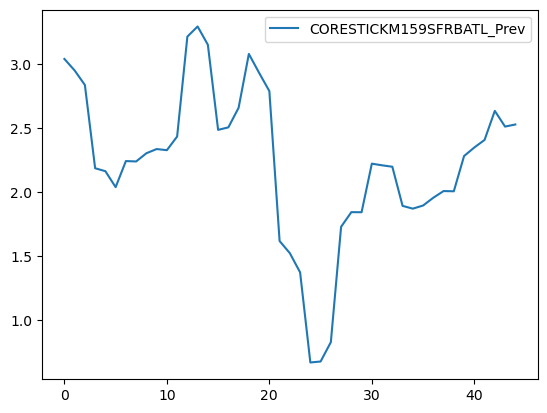

In [48]:
data_df.plot(y='CORESTICKM159SFRBATL_Prev')

In [49]:
data_df['Prev_CORESTICKM159SFRBATL_Prev'] = data_df['CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_CORESTICKM159SFRBATL_Prev'] = data_df['CORESTICKM159SFRBATL_Prev'] - data_df['Prev_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_CORESTICKM159SFRBATL_Prev ~ data_df.index + Prev_CORESTICKM159SFRBATL_Prev', data = data_df).fit() 
print(mod1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     change_CORESTICKM159SFRBATL_Prev   R-squared:                       0.097
Model:                                          OLS   Adj. R-squared:                  0.053
Method:                               Least Squares   F-statistic:                     2.195
Date:                              Sun, 06 Oct 2024   Prob (F-statistic):              0.124
Time:                                      15:56:00   Log-Likelihood:                -12.222
No. Observations:                                44   AIC:                             30.44
Df Residuals:                                    41   BIC:                             35.80
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                     coef    std err          t      P

In [50]:


data_df['Prev_change_CORESTICKM159SFRBATL_Prev'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_change_Prev_CORESTICKM159SFRBATL_Prev'] = data_df['change_CORESTICKM159SFRBATL_Prev'] - data_df['Prev_change_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_change_Prev_CORESTICKM159SFRBATL_Prev ~ 0 + Prev_change_CORESTICKM159SFRBATL_Prev', data = data_df).fit() 
print(mod1.summary())

                                              OLS Regression Results                                             
Dep. Variable:     change_change_Prev_CORESTICKM159SFRBATL_Prev   R-squared (uncentered):                   0.403
Model:                                                      OLS   Adj. R-squared (uncentered):              0.389
Method:                                           Least Squares   F-statistic:                              28.40
Date:                                          Sun, 06 Oct 2024   Prob (F-statistic):                    3.63e-06
Time:                                                  15:56:37   Log-Likelihood:                         -13.791
No. Observations:                                            43   AIC:                                      29.58
Df Residuals:                                                42   BIC:                                      31.34
Df Model:                                                     1                         

CORESTICKM159SFRBATL stationary to first degree

In [108]:
data_df['change_UNRATE_Prev_1'] = data_df['change_UNRATE_Prev'].shift(1)
data_df['change_UNRATE_Prev_2'] = data_df['change_UNRATE_Prev'].shift(2)
data_df['change_UNRATE_Prev_3'] = data_df['change_UNRATE_Prev'].shift(3)
data_df['change_UNRATE_Prev_4'] = data_df['change_UNRATE_Prev'].shift(4)
data_df['change_UNRATE_Prev_5'] = data_df['change_UNRATE_Prev'].shift(5)

data_df['change_CORESTICKM159SFRBATL_Prev_1'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(1)
data_df['change_CORESTICKM159SFRBATL_Prev_2'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(2)
data_df['change_CORESTICKM159SFRBATL_Prev_3'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(3)
data_df['change_CORESTICKM159SFRBATL_Prev_4'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(4)
data_df['change_CORESTICKM159SFRBATL_Prev_5'] = data_df['change_CORESTICKM159SFRBATL_Prev'].shift(5)

data_df['change_REAINTRATREARAT10Y_Prev_1'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(1)
data_df['change_REAINTRATREARAT10Y_Prev_2'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(2)
data_df['change_REAINTRATREARAT10Y_Prev_3'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(3)
data_df['change_REAINTRATREARAT10Y_Prev_4'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(4)
data_df['change_REAINTRATREARAT10Y_Prev_5'] = data_df['change_REAINTRATREARAT10Y_Prev'].shift(5)

data_df['MEDCPIM158SFRBCLE_Prev_1'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(1)
data_df['MEDCPIM158SFRBCLE_Prev_2'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(2)
data_df['MEDCPIM158SFRBCLE_Prev_3'] = data_df['MEDCPIM158SFRBCLE_Prev'].shift(3)

data_df['change_MYAGM2USM052S_Prev_1'] = data_df['change_MYAGM2USM052S_Prev'].shift(1)
data_df['change_MYAGM2USM052S_Prev_2'] = data_df['change_MYAGM2USM052S_Prev'].shift(2)
data_df['change_MYAGM2USM052S_Prev_3'] = data_df['change_MYAGM2USM052S_Prev'].shift(3)
data_df['change_MYAGM2USM052S_Prev_4'] = data_df['change_MYAGM2USM052S_Prev'].shift(4)
data_df['change_MYAGM2USM052S_Prev_5'] = data_df['change_MYAGM2USM052S_Prev'].shift(5)

# Total Sales Used

In [16]:
data_df.plot(y='Total_Sales_Used')

KeyError: 'Total_Sales_Used'

In [29]:
data_df['Prev_Total_Sales_Used'] = data_df['Total_Sales_Used'].shift(1)
data_df['change_Total_Sales_Used'] = data_df['Total_Sales_Used'] - data_df['Prev_Total_Sales_Used']


mod1 = smf.ols(f'change_Total_Sales_Used ~ data_df.index + Prev_Total_Sales_Used', data = data_df).fit() 
print(mod1.summary())

                               OLS Regression Results                              
Dep. Variable:     change_Total_Sales_Used   R-squared:                       0.194
Model:                                 OLS   Adj. R-squared:                  0.154
Method:                      Least Squares   F-statistic:                     4.926
Date:                     Sun, 06 Oct 2024   Prob (F-statistic):             0.0121
Time:                             15:27:43   Log-Likelihood:                -848.21
No. Observations:                       44   AIC:                             1702.
Df Residuals:                           41   BIC:                             1708.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

<AxesSubplot:>

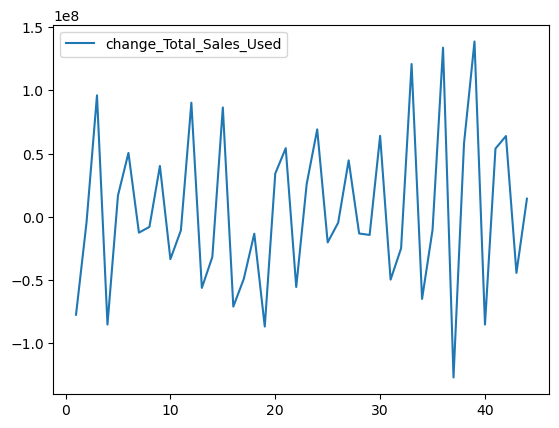

In [31]:
data_df.plot(y='change_Total_Sales_Used')

In [33]:
data_df['Prev_Total_Sales_Used'] = data_df['Total_Sales_Used'].shift(1)
data_df['change_Total_Sales_Used'] = data_df['Total_Sales_Used'] - data_df['Prev_Total_Sales_Used']

data_df['Prev_change_Total_Sales_Used'] = data_df['change_Total_Sales_Used'].shift(1)
data_df['change_change_Prev_Total_Sales_Used'] = data_df['change_Total_Sales_Used'] - data_df['Prev_change_Total_Sales_Used']


mod1 = smf.ols(f'change_change_Prev_Total_Sales_Used ~ 0 + Prev_change_Total_Sales_Used', data = data_df).fit() 
print(mod1.summary())

                                         OLS Regression Results                                         
Dep. Variable:     change_change_Prev_Total_Sales_Used   R-squared (uncentered):                   0.709
Model:                                             OLS   Adj. R-squared (uncentered):              0.702
Method:                                  Least Squares   F-statistic:                              102.4
Date:                                 Sun, 06 Oct 2024   Prob (F-statistic):                    7.84e-13
Time:                                         15:41:49   Log-Likelihood:                         -829.50
No. Observations:                                   43   AIC:                                      1661.
Df Residuals:                                       42   BIC:                                      1663.
Df Model:                                            1                                                  
Covariance Type:                             nonrobust 

Total Sales Used to first derivative is therefore stationary by Dickey-Fuller test since -10.120 < -3.41

In [176]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Total_Sales_Used ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     change_Total_Sales_Used   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.589
Method:                      Least Squares   F-statistic:                     7.715
Date:                     Tue, 08 Oct 2024   Prob (F-statistic):           3.38e-05
Time:                             14:25:13   Log-Likelihood:                -742.31
No. Observations:                       40   AIC:                             1527.
Df Residuals:                           19   BIC:                             1562.
Df Model:                               20                                         
Covariance Type:                       HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [177]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.17739276165447707
Lag 3: 0.047373392259667566
Lag 4: 0.18546968185085225
Lag 5: -0.22186273130641299
Lag 6: 0.21402696619628145


In [169]:
1.96 / math.sqrt(len(data_df))

0.2921795490599725

In [138]:
bic_dict = {}


for lag in range(2, 7):


    formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

    lags = lag

    variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

    for var in variables:

        for i in range(1, lags):

            formula = formula + f' + {var}_{i}'




    mod1 = smf.ols(f'change_Total_Sales_Used ~ {formula}', data = data_df)
    results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  

    bic_dict[lag - 1] = results.bic

In [139]:
bic_dict

{1: 1637.1805679460304,
 2: 1613.6098287673055,
 3: 1590.812745814281,
 4: 1562.084627550116,
 5: 1528.6118063090337}

In [142]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                 -0.365
Method:                 Least Squares   F-statistic:                    0.5763
Date:                Tue, 08 Oct 2024   Prob (F-statistic):              0.886
Time:                        12:59:29   Log-Likelihood:                -1373.4
No. Observations:                  39   AIC:                             2797.
Df Residuals:                      14   BIC:                             2838.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [143]:
len(data_df) * 0.497

22.365

at 24 degrees of freedom 5% crit value is 36.42 and since 22.365 is less than this value passes test of homoskedaticity

## Assumptions of Finite Distributed Lag Model

1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ... 
3. error term is not auto correlated as the 5% crit value is 0.29 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

# Total Sales New

<AxesSubplot:>

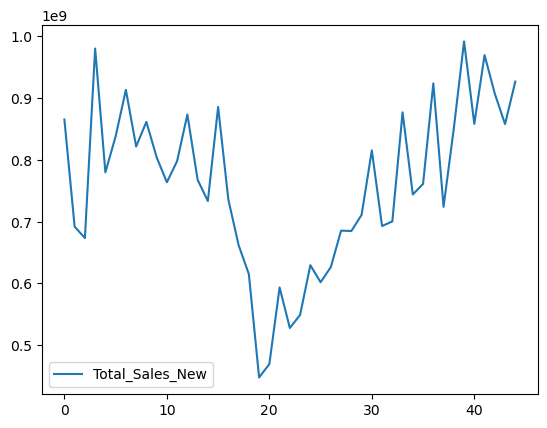

In [145]:
data_df.plot(y='Total_Sales_New')

In [164]:
data_df['Prev_Total_Sales_New'] = data_df['Total_Sales_New'].shift(1)
data_df['change_Total_Sales_New'] = data_df['Total_Sales_New'] - data_df['Prev_Total_Sales_New']


mod1 = smf.ols(f'change_Total_Sales_New ~ data_df.index + Prev_Total_Sales_New', data = data_df).fit() 
print(mod1.summary())

                              OLS Regression Results                              
Dep. Variable:     change_Total_Sales_New   R-squared:                       0.184
Model:                                OLS   Adj. R-squared:                  0.144
Method:                     Least Squares   F-statistic:                     4.613
Date:                    Tue, 08 Oct 2024   Prob (F-statistic):             0.0156
Time:                            14:23:22   Log-Likelihood:                -873.04
No. Observations:                      44   AIC:                             1752.
Df Residuals:                          41   BIC:                             1757.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Nonstaionary

In [170]:
data_df['Prev_Total_Sales_New'] = data_df['Total_Sales_New'].shift(1)
data_df['change_Total_Sales_New'] = data_df['Total_Sales_New'] - data_df['Prev_Total_Sales_New']

data_df['Prev_change_Total_Sales_New'] = data_df['change_Total_Sales_New'].shift(1)
data_df['change_change_Prev_Total_Sales_New'] = data_df['change_Total_Sales_New'] - data_df['Prev_change_Total_Sales_New']


mod1 = smf.ols(f'change_change_Prev_Total_Sales_New ~ 0 + Prev_change_Total_Sales_New', data = data_df).fit() 
print(mod1.summary())

                                         OLS Regression Results                                        
Dep. Variable:     change_change_Prev_Total_Sales_New   R-squared (uncentered):                   0.712
Model:                                            OLS   Adj. R-squared (uncentered):              0.705
Method:                                 Least Squares   F-statistic:                              103.9
Date:                                Tue, 08 Oct 2024   Prob (F-statistic):                    6.31e-13
Time:                                        14:24:03   Log-Likelihood:                         -852.88
No. Observations:                                  43   AIC:                                      1708.
Df Residuals:                                      42   BIC:                                      1710.
Df Model:                                           1                                                  
Covariance Type:                            nonrobust           

Stationary I(1)

In [174]:
formula = 'change_MYAGM2USM052S_Prev + change_CORESTICKM159SFRBATL_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev'

lags = 5

variables = ['change_CORESTICKM159SFRBATL_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_MYAGM2USM052S_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Total_Sales_New ~ {formula}', data = data_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     change_Total_Sales_New   R-squared:                       0.750
Model:                                OLS   Adj. R-squared:                  0.487
Method:                     Least Squares   F-statistic:                     11.57
Date:                    Tue, 08 Oct 2024   Prob (F-statistic):           1.49e-06
Time:                            14:25:02   Log-Likelihood:                -764.60
No. Observations:                      40   AIC:                             1571.
Df Residuals:                          19   BIC:                             1607.
Df Model:                              20                                         
Covariance Type:                      HAC                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [175]:

from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: -0.1413046968145453
Lag 3: -0.07884733764132414
Lag 4: 0.015430903873462376
Lag 5: -0.16940920313859778
Lag 6: 0.1011752931233515


In [178]:
1.96 / math.sqrt(len(data_df))

0.2921795490599725

In [1]:
data_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = data_df)
results = mod1.fit()  
print(results.summary())

NameError: name 'residuals' is not defined

In [126]:
# chi squared test 5% signifcance level with 4 degrees of freedom is 9.488 so fail to reject null hypothesis of homoskedaticity

0.149 * 45

6.705

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a DataFrame for the VIF results
vif_data = pd.DataFrame()
vif_data['features'] = res2.params.index[1:]  # Exclude the intercept
vif_data['VIF'] = [variance_inflation_factor(res2.model.exog, i) for i in range(1, len(res2.params))]

# Step 3: Print VIF results
print(vif_data)

                    features       VIF
0         MYAGM2USM052S_Prev  3.968209
1                UNRATE_Prev  3.944187
2    REAINTRATREARAT10Y_Prev  5.341506
3  CORESTICKM159SFRBATL_Prev  2.694422


Jarque-Bera (JB) test is not statistically signifcant indicating that the errors have a normal distribution and there is some collinearity among the variables but not signifcant. 

# Avg Used

In [156]:
import statsmodels.formula.api as smf 

# Estimating using R style formulas. Note the function is called "ols"
formula2='Avg_Used ~ CORESTICKM159SFRBATL_Prev + REAINTRATREARAT10Y_Prev + MYAGM2USM052S_Prev + UNRATE_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               Avg_Used   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     71.07
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.23e-17
Time:                        16:05:41   Log-Likelihood:                -331.46
No. Observations:                  45   AIC:                             672.9
Df Residuals:                      40   BIC:                             682.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [129]:
# testing for heteroskedaticity

data_df['resid_sq'] = res2.resid**2

# Estimating using R style formulas. Note the function is called "ols"
formula2='resid_sq ~ MYAGM2USM052S_Prev + UNRATE_Prev + REAINTRATREARAT10Y_Prev + CORESTICKM159SFRBATL_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               resid_sq   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.507
Date:                Sat, 05 Oct 2024   Prob (F-statistic):             0.0571
Time:                        15:44:40   Log-Likelihood:                -610.51
No. Observations:                  45   AIC:                             1231.
Df Residuals:                      40   BIC:                             1240.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [130]:
# chi squared test 5% signifcance level with 4 degrees of freedom is 9.488 so fail to reject null hypothesis of homoskedaticity

0.200 * 45

9.0

Jarque-Bera (JB) test is not statistically signifcant indicating that the errors have a normal distribution and there is some collinearity among the variables but not signifcant. 

# Avg_New

In [131]:
import statsmodels.formula.api as smf 

# Estimating using R style formulas. Note the function is called "ols"
formula2='Avg_New ~ CORESTICKM159SFRBATL_Prev + REAINTRATREARAT10Y_Prev + MYAGM2USM052S_Prev + UNRATE_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                Avg_New   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           5.65e-25
Time:                        15:46:24   Log-Likelihood:                -355.64
No. Observations:                  45   AIC:                             721.3
Df Residuals:                      40   BIC:                             730.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [132]:
# testing for heteroskedaticity

data_df['resid_sq'] = res2.resid**2

# Estimating using R style formulas. Note the function is called "ols"
formula2='resid_sq ~ MYAGM2USM052S_Prev + UNRATE_Prev + REAINTRATREARAT10Y_Prev + CORESTICKM159SFRBATL_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               resid_sq   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.1498
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.962
Time:                        15:46:30   Log-Likelihood:                -659.77
No. Observations:                  45   AIC:                             1330.
Df Residuals:                      40   BIC:                             1339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [133]:
# chi squared test 5% signifcance level with 4 degrees of freedom is 9.488 so fail to reject null hypothesis of homoskedaticity

0.015 * 45

0.6749999999999999

Jarque-Bera (JB) test is not statistically signifcant indicating that the errors have a normal distribution and there is some collinearity among the variables but not signifcant. 

# Ratio_Used_New

In [134]:
import statsmodels.formula.api as smf 

# Estimating using R style formulas. Note the function is called "ols"
formula2='Ratio_Used_New ~ CORESTICKM159SFRBATL_Prev + REAINTRATREARAT10Y_Prev + MYAGM2USM052S_Prev + UNRATE_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:         Ratio_Used_New   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     20.95
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.23e-09
Time:                        15:48:21   Log-Likelihood:                 25.401
No. Observations:                  45   AIC:                            -40.80
Df Residuals:                      40   BIC:                            -31.77
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [135]:
# testing for heteroskedaticity

data_df['resid_sq'] = res2.resid**2

# Estimating using R style formulas. Note the function is called "ols"
formula2='resid_sq ~ MYAGM2USM052S_Prev + UNRATE_Prev + REAINTRATREARAT10Y_Prev + CORESTICKM159SFRBATL_Prev'
res2=smf.ols(formula=formula2, data=data_df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               resid_sq   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8304
Date:                Sat, 05 Oct 2024   Prob (F-statistic):              0.514
Time:                        15:48:31   Log-Likelihood:                 107.95
No. Observations:                  45   AIC:                            -205.9
Df Residuals:                      40   BIC:                            -196.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [136]:
# chi squared test 5% signifcance level with 4 degrees of freedom is 9.488 so fail to reject null hypothesis of homoskedaticity
0.077 * 45

3.465

Jarque-Bera (JB) test is statistically signifcant indicating that the errors do not have a normal distribution therefore violating this linear regression assumption